# Question 3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ed_df = pd.read_csv("data/educ_inc.csv", sep=",")
ed_df

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
4,1/1/08 0:00,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
...,...,...,...,...,...,...
1021,1/1/14 0:00,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,1/1/14 0:00,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,1/1/14 0:00,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,1/1/14 0:00,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


In [4]:
ed_df.dtypes

Year                      object
Age                       object
Gender                    object
Educational Attainment    object
Personal Income           object
Population Count           int64
dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ed_df["Age"] = encoder.fit_transform(ed_df["Age"])

### Encoding age ranges:
### 0 -> 00 to 17
### 1 -> 18 to 64
### 2 -> 65 to 80+

In [6]:
ed_df

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,1/1/08 0:00,0,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,1/1/08 0:00,0,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,1/1/08 0:00,2,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,1/1/08 0:00,2,Female,No high school diploma,"H: 75,000 and over",1981
4,1/1/08 0:00,0,Female,No high school diploma,"D: 15,000 to 24,999",2009
...,...,...,...,...,...,...
1021,1/1/14 0:00,1,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,1/1/14 0:00,1,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,1/1/14 0:00,1,Female,No high school diploma,"A: 0 to 4,999",723208
1024,1/1/14 0:00,1,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


### 1.	Group the table by Educational Attainment and sum the Population Count in each category.

In [7]:
ed_df.groupby(by="Educational Attainment")["Population Count"].sum()

Educational Attainment
Bachelor's degree or higher       54617676
College, less than 4-yr degree    52137494
High school or equivalent         42942926
No high school diploma            40668871
Name: Population Count, dtype: int64

### 2.	Analyse the percentage distribution of educational attainment among adult Californians.

In [8]:
group_result = pd.DataFrame(ed_df[ed_df["Age"] >= 1].groupby(by="Educational Attainment")["Population Count"].sum())
group_result

,Population Count
Educational Attainment,
Bachelor's degree or higher,54603003
"College, less than 4-yr degree",52045952
High school or equivalent,42828045
No high school diploma,31102348


In [9]:
sum_ = group_result["Population Count"].sum()
sum_

180579348

In [10]:
group_result["Percentage"] = (group_result["Population Count"]/sum_) * 100
group_result

,Population Count,Percentage
Educational Attainment,,
Bachelor's degree or higher,54603003,30.237679
"College, less than 4-yr degree",52045952,28.821652
High school or equivalent,42828045,23.717023
No high school diploma,31102348,17.223646


In [11]:
ed_df["Personal Income"].value_counts()

Personal Income
A: 0 to 4,999          143
B: 5,000 to 9,999      141
C: 10,000 to 14,999    138
D: 15,000 to 24,999    137
E: 25,000 to 34,999    122
F: 35,000 to 49,999    118
G: 50,000 to 74,999    115
H: 75,000 and over     112
Name: count, dtype: int64

In [12]:
no_diploma = ed_df[ed_df["Educational Attainment"] == "No high school diploma"]
no_diploma

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
3,1/1/08 0:00,2,Female,No high school diploma,"H: 75,000 and over",1981
4,1/1/08 0:00,0,Female,No high school diploma,"D: 15,000 to 24,999",2009
5,1/1/08 0:00,0,Male,No high school diploma,"F: 35,000 to 49,999",2227
6,1/1/08 0:00,0,Male,No high school diploma,"E: 25,000 to 34,999",2606
8,1/1/08 0:00,0,Male,No high school diploma,"D: 15,000 to 24,999",3974
...,...,...,...,...,...,...
1000,1/1/14 0:00,1,Male,No high school diploma,"A: 0 to 4,999",376783
1007,1/1/14 0:00,1,Male,No high school diploma,"D: 15,000 to 24,999",460129
1018,1/1/14 0:00,0,Male,No high school diploma,"A: 0 to 4,999",610313
1019,1/1/14 0:00,0,Female,No high school diploma,"A: 0 to 4,999",639596


In [33]:
bach_higher = ed_df[ed_df["Educational Attainment"] == "Bachelor's degree or higher"]
bach_higher

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
22,1/1/08 0:00,2,Female,Bachelor's degree or higher,"A: 0 to 4,999",12915
31,1/1/08 0:00,2,Male,Bachelor's degree or higher,"A: 0 to 4,999",25141
32,1/1/08 0:00,2,Male,Bachelor's degree or higher,"B: 5,000 to 9,999",27004
45,1/1/08 0:00,2,Female,Bachelor's degree or higher,"D: 15,000 to 24,999",42390
46,1/1/08 0:00,2,Female,Bachelor's degree or higher,"E: 25,000 to 34,999",42705
...,...,...,...,...,...,...
1015,1/1/14 0:00,1,Female,Bachelor's degree or higher,"F: 35,000 to 49,999",531019
1020,1/1/14 0:00,1,Female,Bachelor's degree or higher,"G: 50,000 to 74,999",660048
1022,1/1/14 0:00,1,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1024,1/1/14 0:00,1,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


In [13]:
x = no_diploma["Personal Income"].value_counts()
x

Personal Income
C: 10,000 to 14,999    42
B: 5,000 to 9,999      42
A: 0 to 4,999          42
D: 15,000 to 24,999    39
F: 35,000 to 49,999    33
E: 25,000 to 34,999    33
G: 50,000 to 74,999    30
H: 75,000 and over     26
Name: count, dtype: int64

In [37]:
y = bach_higher["Personal Income"].value_counts()
y

Personal Income
A: 0 to 4,999          30
D: 15,000 to 24,999    30
E: 25,000 to 34,999    29
C: 10,000 to 14,999    29
H: 75,000 and over     29
B: 5,000 to 9,999      28
G: 50,000 to 74,999    28
F: 35,000 to 49,999    28
Name: count, dtype: int64

In [25]:
x_plot_value = x.index.to_numpy()

In [47]:
x_plot_value2 = y.index.to_numpy()

In [48]:
y_plot_value = x.values

In [49]:
y_plot_value2 = y.values

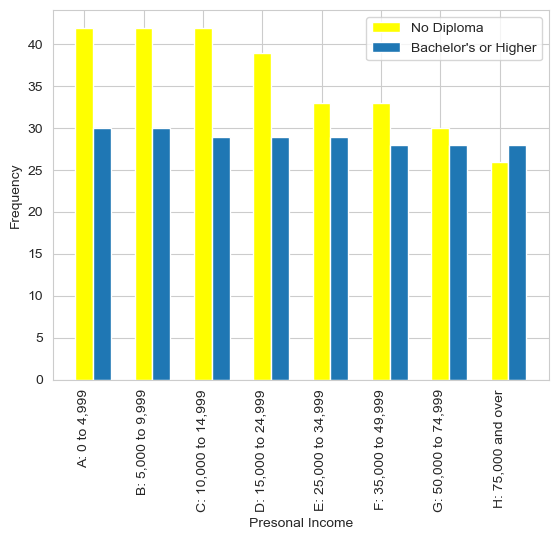

In [73]:
x_axis = np.arange(len(x_plot_value))
plt.bar(x_axis, y_plot_value, width=0.3, color='yellow', label="No Diploma")
plt.bar(x_axis + 0.3, y_plot_value2, width=0.3, label="Bachelor's or Higher")
plt.xticks(x_axis, x_plot_value, rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Presonal Income")
plt.legend()
plt.show()